In [4]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch import optim, nn
from torchvision import datasets, transforms

import helper 

In [5]:
train_transform = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor()])

test_transform = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor()])

train_data = datasets.EMNIST('~/.pytorch/EMNIST_data/', download=True, train = True, split='letters', transform=train_transform)
test_data = datasets.EMNIST('~/.pytorch/EMNIST_data/', download = True, train = False,split='letters', transform=test_transform)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)

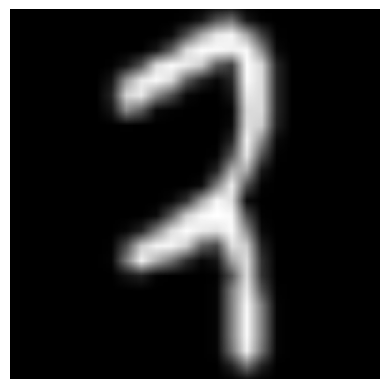

In [6]:
# image[0]# Convert tensor to numpy array and transpose to (H, W, C)
image, label = next(iter(trainloader))
img = image[0].numpy().transpose(1, 2, 0)

# For grayscale images (like EMNIST), squeeze to remove the single channel dim and use grayscale colormap
if img.shape[2] == 1:
    img = img.squeeze(axis=2)  # Remove channel dim
    plt.imshow(img, cmap='gray')
else:
    plt.imshow(img)  # For RGB images

plt.axis('off')  # Hide axes for cleaner display
plt.show()  # Display the image